In [ ]:
%tensorflow_version 2.x


In [ ]:
#1. keras -> tensorfloq.keras
from tensorflow.keras.datasets.mnist import load_data
#((x_train, y_train),(x_test, y_test) )
(x_train, y_train),(x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


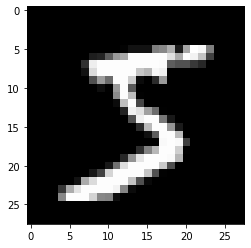

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap="gray")

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
mlp = Sequential()
#第一層選用128層(憑經驗選擇，784/10約為100，64 or 256)且設為relu，784為28*28攤開成一維
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#最後一層個數
#1:binary_crossentropy  2up:categorical_crossentropy
#激活函數
#1:sigmoid 2up:softmax

# from tensorflow.keras.losses import categorical_crossentropy
# mlp.compile(loss=categorical_crossentropy,
#               optimizer="adam",
#               metrics=["accuracy"],)

mlp.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
#Normalization，reshape(-1,)指電腦計算
#mlp:進去要1D，tensorflow:輸入[-1,1][0,1]
x_train_norm = x_train.reshape(-1,784)/255
x_test_norm = x_test.reshape(-1,784)/255
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical 
y_train_cat = to_categorical (y_train)
y_test_cat = to_categorical (y_test)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import pandas as pd
 
x_train_norm = pd.DataFrame(x_train_norm)
y_train_cat = pd.DataFrame(y_train_cat)

In [ ]:
type(y_train_cat)

pandas.core.frame.DataFrame

In [ ]:
#batch_size:問多少筆資料進行一次梯度下降(平均)
#epochs:整份資料要看幾遍
#validation_split:train_test_split驗證模型到底好不好
#verbose: log level(0:沒有，1:適中，2:最多)
#270次的調整:60000*(1-10%)=54000，54000/一次200筆=270
#看val_loss的結果，而非val_accuracy，前面train的結果也可以忽略
mlp.fit(x_train_norm,
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split=0.1,
        verbose=2)

Epoch 1/15
270/270 - 1s - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0780 - val_accuracy: 0.9780
Epoch 2/15
270/270 - 1s - loss: 0.0180 - accuracy: 0.9964 - val_loss: 0.0773 - val_accuracy: 0.9782
Epoch 3/15
270/270 - 1s - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.0779 - val_accuracy: 0.9793
Epoch 4/15
270/270 - 1s - loss: 0.0134 - accuracy: 0.9976 - val_loss: 0.0823 - val_accuracy: 0.9767
Epoch 5/15
270/270 - 1s - loss: 0.0123 - accuracy: 0.9979 - val_loss: 0.0772 - val_accuracy: 0.9803
Epoch 6/15
270/270 - 1s - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0785 - val_accuracy: 0.9795
Epoch 7/15
270/270 - 1s - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.0768 - val_accuracy: 0.9793
Epoch 8/15
270/270 - 1s - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.0783 - val_accuracy: 0.9788
Epoch 9/15
270/270 - 1s - loss: 0.0071 - accuracy: 0.9993 - val_loss: 0.0810 - val_accuracy: 0.9802
Epoch 10/15
270/270 - 1s - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0785 - val_accuracy: 0.9800

In [ ]:
#做one-hot encoding 是的為1 不是的為0
#predict:機率 predict_classes:類別
pre = mlp.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9786


[0.08563551306724548, 0.978600025177002]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(正確)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row),3) for row in mat]
pd.DataFrame(mat,columns=c,index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.989,0.001,0.001,0.001,0.000,0.002,0.003,0.001,0.002,0.000
1(正確),0.000,0.989,0.003,0.001,0.000,0.001,0.002,0.001,0.004,0.000
2(正確),0.002,0.003,0.963,0.004,0.003,0.000,0.003,0.013,0.010,0.000
3(正確),0.000,0.000,0.000,0.986,0.000,0.004,0.000,0.005,0.005,0.000
4(正確),0.001,0.000,0.001,0.001,0.986,0.000,0.004,0.001,0.001,0.005
5(正確),0.003,0.000,0.000,0.010,0.001,0.972,0.007,0.001,0.004,0.001
6(正確),0.004,0.002,0.000,0.001,0.003,0.005,0.983,0.000,0.001,0.000
7(正確),0.002,0.003,0.007,0.005,0.001,0.000,0.000,0.979,0.001,0.003
8(正確),0.003,0.000,0.003,0.007,0.005,0.004,0.001,0.004,0.971,0.001
9(正確),0.001,0.003,0.000,0.014,0.014,0.005,0.001,0.007,0.003,0.952


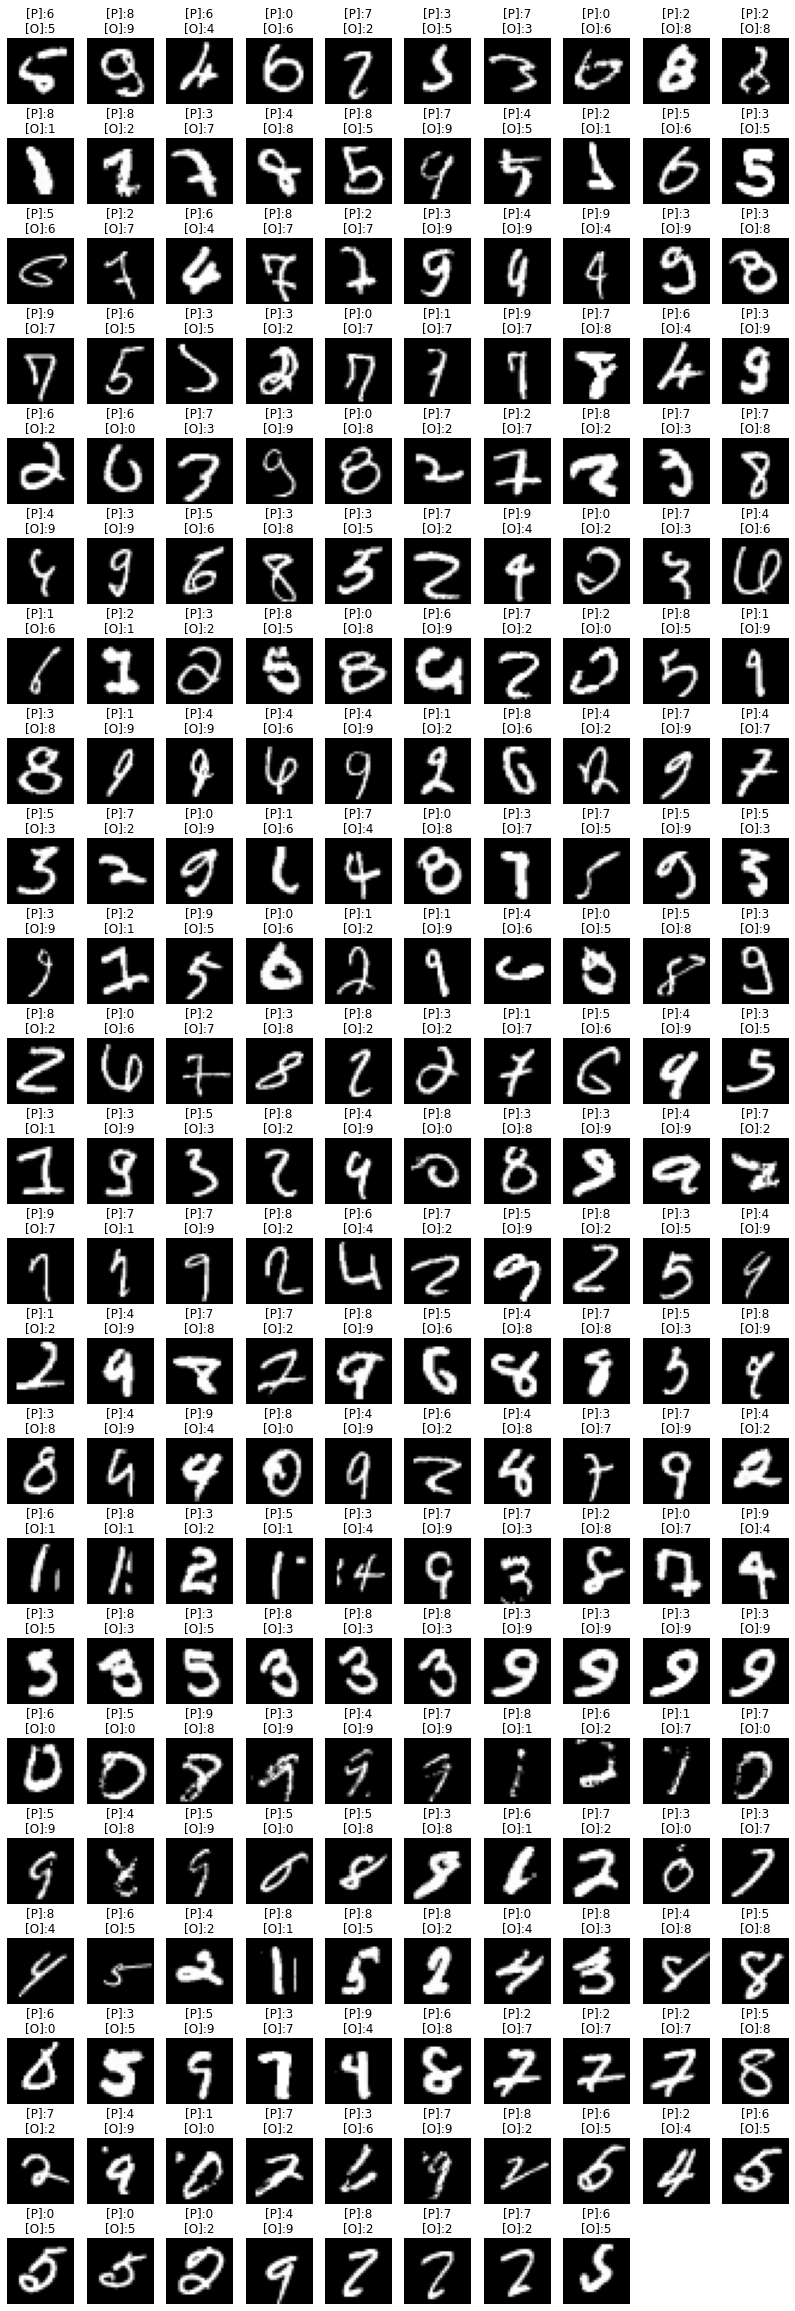

In [ ]:
idx = np.nonzero(pre != y_test)[0]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx)//width + 1
plt.figure(figsize=(14,42))
for i,img in enumerate(false_pre_img):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[O]:{}".format(false_pre_predict[i],
                             false_pre_label[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img, cmap="gray")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28,28)).convert("L")
img = np.array(img_raw).reshape(1,784)/255
ans = mlp.predict_classes(img)[0]
print("正確答案應該是:", ans)
plt.imshow(img_raw, cmap="gray")